<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [2]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [7]:
# Ваш код здесь
data['sex'].value_counts()

# ans 1:
# Male: 21790
# Female: 10771

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [9]:
# Ваш код здесь
data[data['sex'] == 'Female']['age'].mean()

# ans 2: 36.85823043357163

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [11]:
# Ваш код здесь
germans = data[data['native-country'] == 'Germany'].shape[0]
total = data.shape[0]

germans / float(total)

# ans 3: 0.004207487485028101

0.004207487485028101

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

(array([ 10.,   3.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([    51.,   1096.,   2141.,   3186.,   4231.,   5276.,   6321.,
          7366.,   8411.,   9456.,  10501.]),
 <a list of 10 Patch objects>)

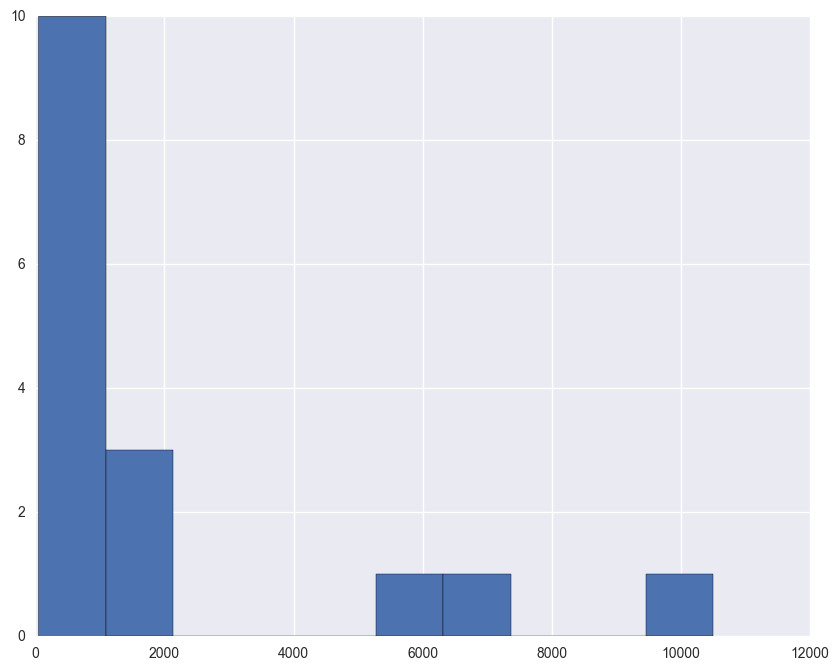

In [15]:
# Ваш код здесь

plt.hist(data['education'].value_counts())


**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [27]:
# Ваш код здесь
top_salary = data[data['salary'] == '<=50K']['age']
bottom_salary = data[data['salary'] == '>50K']['age']

print('ans 5:')
print('top salary: mean: {} std: {}'.format(
        top_salary.mean(), top_salary.std()))
print('bottom salary: mean: {} std: {}'.format(
        bottom_salary.mean(), bottom_salary.std()))

ans 5:
top salary: mean: 36.78373786407767 std: 14.020088490824813
bottom salary: mean: 44.24984058155847 std: 10.51902771985177


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [30]:
# Ваш код здесь
data[data['salary'] == '>50K']['education'].value_counts()

# ans 6: No

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [34]:
# Ваш код здесь
tmp = data.groupby(['race', 'sex'])['age'].describe()

tmp['Amer-Indian-Eskimo']

# ans 7: 82

sex          
Female  count    119.000000
        mean      37.117647
        std       13.114991
        min       17.000000
        25%       27.000000
        50%       36.000000
        75%       46.000000
        max       80.000000
Male    count    192.000000
        mean      37.208333
        std       12.049563
        min       17.000000
        25%       28.000000
        50%       35.000000
        75%       45.000000
        max       82.000000
Name: age, dtype: float64

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married*, остальных считаем холостыми.**

In [48]:
# Ваш код здесь

data['married'] = data['marital-status'].apply(lambda it: 'Married' if 'Married' in it else 'Not')
pd.crosstab(data['salary'], data['married'], margins=True)

# ans 8: In married

married,Married,Not,All
salary,,,
<=50K,8681,16039,24720
>50K,6736,1105,7841
All,15417,17144,32561


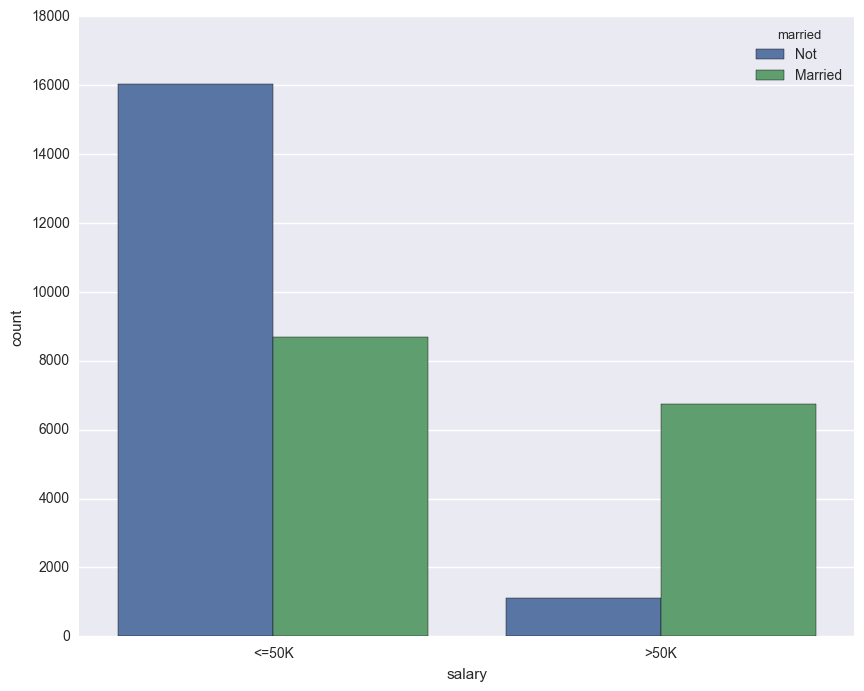

In [47]:
sns.countplot(x='salary', hue='married', data=data);

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [51]:
# Ваш код здесь

max_hours = data['hours-per-week'].max()
print('max hours: {}'.format(max_hours))

crazy_people = data[data['hours-per-week'] == max_hours].shape[0]
print('people with max hours: {}'.format(crazy_people))

# ans 9: max hours: 99, people: 85

max hours: 99
people with max hours: 85


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих много и мало (*salary*) для каждой страны (*native-country*).**

In [52]:
# Ваш код здесь
data.groupby(['salary', 'native-country'])['hours-per-week'].mean()

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     